# Exploratory Data Analysis

### Data Pre-Processing/ Data Cleaning

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv("bda_data1.csv")
df2 = pd.read_csv("bda_data2.csv")
df3 = pd.read_csv("bda_data3.csv")
df4 = pd.read_csv("bda_data4.csv")

df = pd.concat([df1, df2, df3, df4])

print("Combined dataset:")
print(df.head())

Combined dataset:
  Influencer_insta_username Influencer_real_name Content_category  \
0                 csaunders         James Wilson     Spirituality   
1               maryfreeman            Brian Kim            Music   
2                    lynn87      Gordon Saunders      Real Estate   
3                   daycody       Michael Harris      Real Estate   
4                michelle95     Kristine Robbins          Medical   

   Number_of_followers Audience_country Influencer_location  \
0                71095         Pakistan              Sweden   
1                25054        Indonesia              Brazil   
2                75147       Bangladesh        Saudi Arabia   
3                99131           Sweden             Ireland   
4                38282   United Kingdom              Sweden   

  Audience_age_range  Engagement_rate Majority_audience_gender Youtuber  \
0              52-84              6.1                   Female      Yes   
1              48-59              5.4 

In [ ]:
print(df.describe())

       Number_of_followers  Engagement_rate  Avg_likes_partnership_posts
count         1.000000e+06   1000000.000000               1000000.000000
mean          1.420442e+06         2.962082                  4677.791188
std           2.364822e+06         1.349223                  4223.686837
min           9.000000e+02         0.500000                   500.000000
25%           2.048808e+05         1.900000                  2333.000000
50%           4.508300e+05         2.700000                  3860.000000
75%           9.018980e+05         4.000000                  6071.000000
max           9.999987e+06         6.500000                 49999.000000


In [ ]:
print(df.dtypes)

Influencer_insta_username       object
Influencer_real_name            object
Content_category                object
Number_of_followers              int64
Audience_country                object
Influencer_location             object
Audience_age_range              object
Engagement_rate                float64
Majority_audience_gender        object
Youtuber                        object
Cost_per_post                   object
Avg_likes_partnership_posts      int64
dtype: object


In [ ]:
print(df.isnull().sum())

Influencer_insta_username          0
Influencer_real_name            9991
Content_category                   0
Number_of_followers                0
Audience_country               10060
Influencer_location             9891
Audience_age_range             19819
Engagement_rate                    0
Majority_audience_gender        9983
Youtuber                        9893
Cost_per_post                      0
Avg_likes_partnership_posts        0
dtype: int64


In [ ]:
df.dropna(subset=['Influencer_real_name','Influencer_location','Majority_audience_gender','Influencer_location','Majority_audience_gender'], inplace=True)
print(df.head())

  Influencer_insta_username Influencer_real_name Content_category  \
0                 csaunders         James Wilson     Spirituality   
1               maryfreeman            Brian Kim            Music   
2                    lynn87      Gordon Saunders      Real Estate   
3                   daycody       Michael Harris      Real Estate   
4                michelle95     Kristine Robbins          Medical   

   Number_of_followers Audience_country Influencer_location  \
0                71095         Pakistan              Sweden   
1                25054        Indonesia              Brazil   
2                75147       Bangladesh        Saudi Arabia   
3                99131           Sweden             Ireland   
4                38282   United Kingdom              Sweden   

  Audience_age_range  Engagement_rate Majority_audience_gender Youtuber  \
0              52-84              6.1                   Female      Yes   
1              48-59              5.4                   

In [ ]:
most_common_country = df['Audience_country'].mode()[0]
most_common_agegrp = df['Audience_age_range'].mode()[0]

df['Audience_country'].fillna(most_common_country, inplace=True)
df['Audience_age_range'].fillna(most_common_agegrp, inplace=True)
df['Youtuber'].fillna('not provided', inplace=True)

print(df.isnull().sum())

Influencer_insta_username      0
Influencer_real_name           0
Content_category               0
Number_of_followers            0
Audience_country               0
Influencer_location            0
Audience_age_range             0
Engagement_rate                0
Majority_audience_gender       0
Youtuber                       0
Cost_per_post                  0
Avg_likes_partnership_posts    0
dtype: int64


### Value Conversion

In [ ]:
def convert_to_numer(value):
    if isinstance(value, str):
        if value.endswith('K'):
            return float(value[:-1]) * 1000
        elif value.endswith('M'):
            return float(value[:-1]) * 1000000
    return value

df['Avg_likes_partnership_posts'] = df['Avg_likes_partnership_posts'].apply(convert_to_numer)

In [ ]:
df['Number_of_followers'] = df['Number_of_followers'].apply(convert_to_numer)

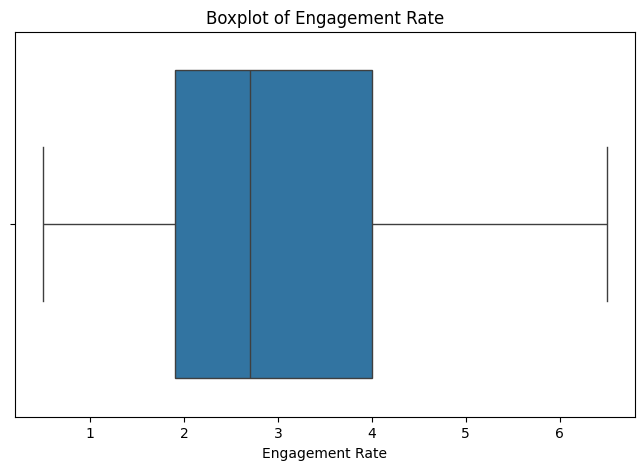

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Engagement_rate', data=df)
plt.title('Boxplot of Engagement Rate')
plt.xlabel('Engagement Rate')
plt.show()

In [ ]:
print(df['Engagement_rate'].describe())

count    970386.000000
mean          2.962116
std           1.349386
min           0.500000
25%           1.900000
50%           2.700000
75%           4.000000
max           6.500000
Name: Engagement_rate, dtype: float64


<ipython-input-96-f887915ecfbd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Content_category', data=df, palette = sns.color_palette("flare"))
<ipython-input-96-f887915ecfbd>:2: UserWarning: 
The palette list has fewer values (6) than needed (28) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y='Content_category', data=df, palette = sns.color_palette("flare"))


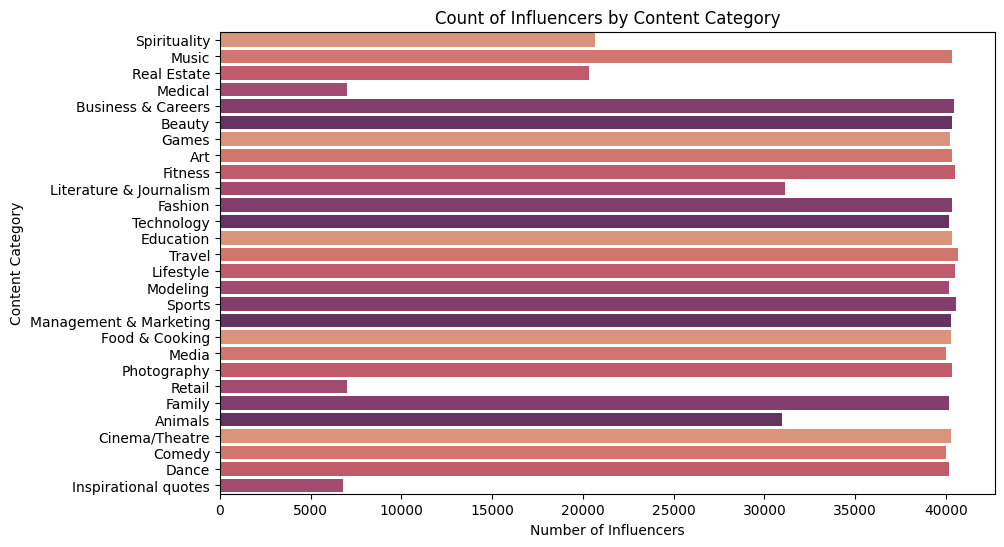

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Content_category', data=df, palette = sns.color_palette("flare"))
plt.title('Count of Influencers by Content Category')
plt.xlabel('Number of Influencers')
plt.ylabel('Content Category')
plt.show()

In [ ]:
print(df['Number_of_followers'])

0           71095
1           25054
2           75147
3           99131
4           38282
           ...   
199995    3792646
199996    2010167
199997    6366213
199998    8815483
199999    5283054
Name: Number_of_followers, Length: 970386, dtype: int64


In [ ]:
column_name = 'Number_of_followers'

column_min = df[column_name].min()
column_max = df[column_name].max()

print("Minimum value of column '{}': {}".format(column_name, column_min))
print("Maximum value of column '{}': {}".format(column_name, column_max))

Minimum value of column 'Number_of_followers': 900
Maximum value of column 'Number_of_followers': 9999987


In [ ]:
bins = [0, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000]

bin_labels = ['Under 1K', '1K to 5K', '5K to 10K', '10K to 50K', '50K to 100K', '100K to 500K', '500K to 1M', '1M to 5M', '5M to 10M']

df['Followers Range'] = pd.cut(df['Number_of_followers'], bins=bins, labels=bin_labels, right=False)

print(df[['Number_of_followers', 'Followers Range']])

        Number_of_followers Followers Range
0                     71095     50K to 100K
1                     25054      10K to 50K
2                     75147     50K to 100K
3                     99131     50K to 100K
4                     38282      10K to 50K
...                     ...             ...
199995              3792646        1M to 5M
199996              2010167        1M to 5M
199997              6366213       5M to 10M
199998              8815483       5M to 10M
199999              5283054       5M to 10M

[970386 rows x 2 columns]


### Engagement Rate on Instagram

* Less than 1% = low engagement rate.
* Between 1% and 3.5% = average/good engagement rate.
* Between 3.5% and 6% = high engagement rate.
* Above 6% = very high engagement rate.

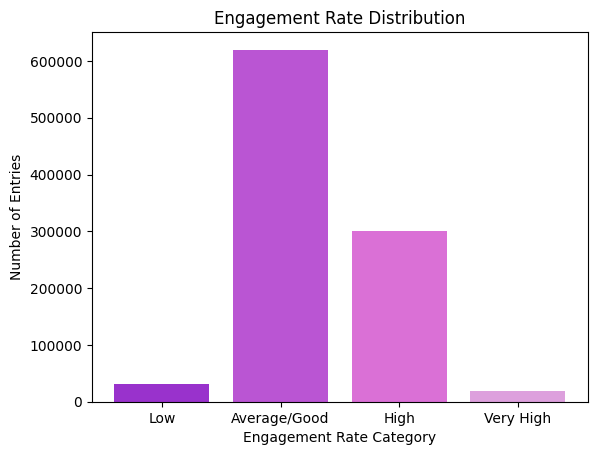

In [ ]:
def categorize_rate(rate):
    if rate < 1:
        return 'Low'
    elif 1 <= rate < 3.5:
        return 'Average/Good'
    elif 3.5 <= rate < 6:
        return 'High'
    else:
        return 'Very High'

df['engagement_category'] = df['Engagement_rate'].apply(categorize_rate)

categories = ['Low', 'Average/Good', 'High', 'Very High']
category_counts = df['engagement_category'].value_counts()[categories]

colors = ['darkorchid', 'mediumorchid', 'orchid', 'plum']

plt.bar(categories, category_counts, color=colors)
plt.xlabel('Engagement Rate Category')
plt.ylabel('Number of Entries')
plt.title('Engagement Rate Distribution')
plt.show()

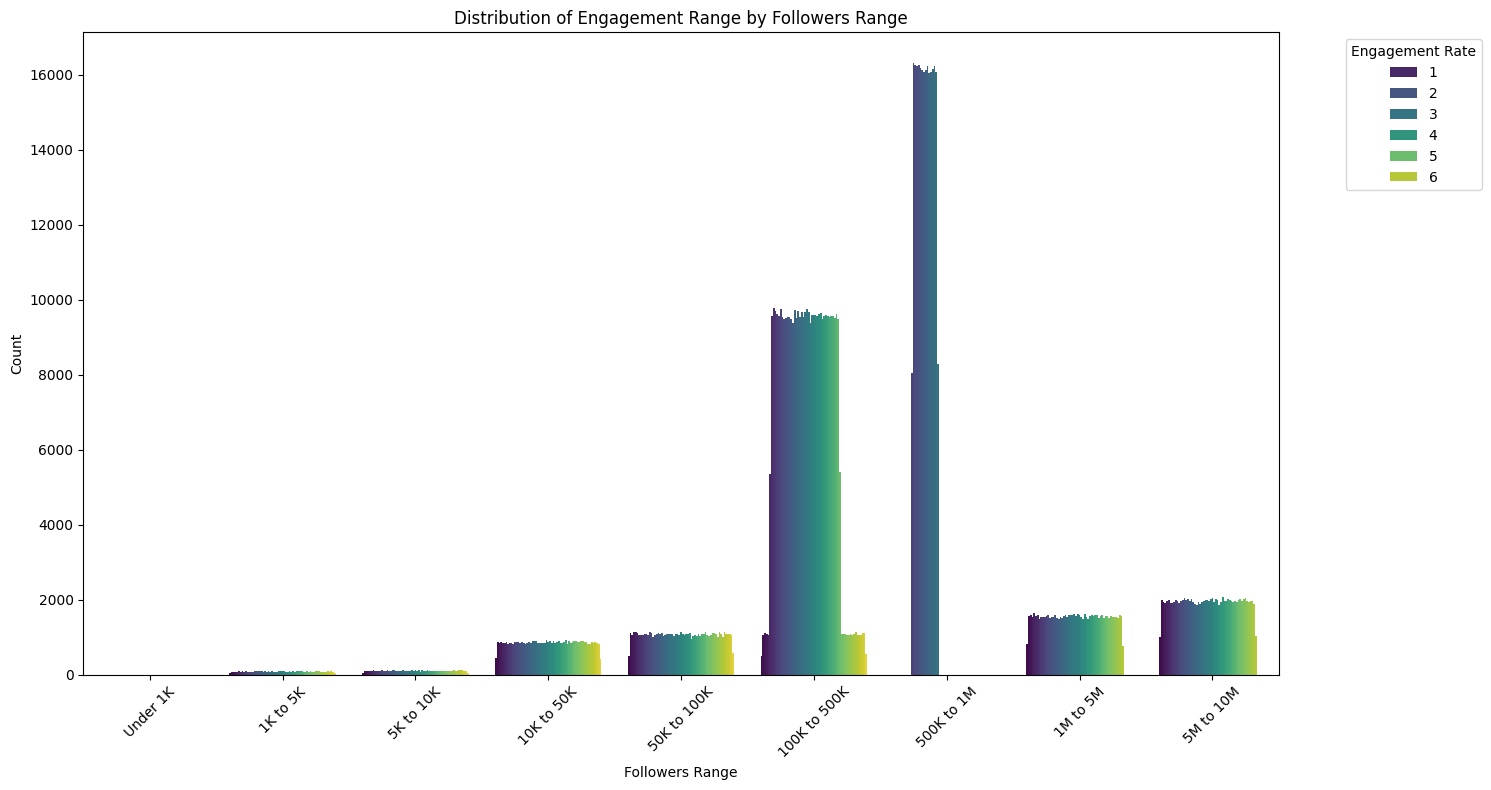

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Followers Range', data=df, hue='Engagement_rate', palette='viridis')
plt.title('Distribution of Engagement Range by Followers Range')
plt.xlabel('Followers Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Engagement Rate', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

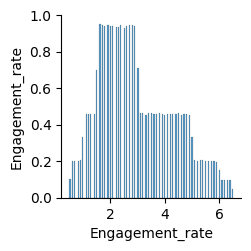

In [ ]:
sns.pairplot(df[['Followers Range', 'Engagement_rate']])
plt.show()

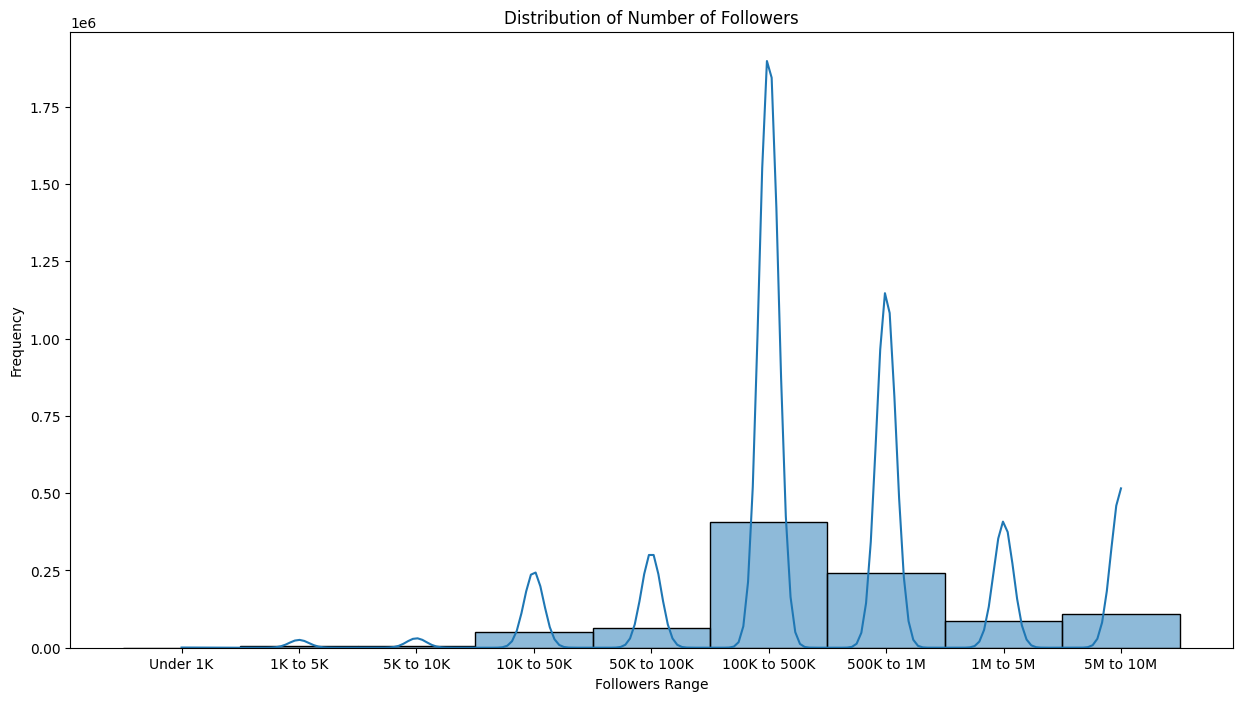

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(df['Followers Range'], bins=20, kde=True)
plt.title('Distribution of Number of Followers')
plt.xlabel('Followers Range')
plt.ylabel('Frequency')
plt.show()

<ipython-input-105-44aecf62c139>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Audience_country', y='Engagement_rate', data=df, ci=None, palette = 'magma')
<ipython-input-105-44aecf62c139>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Audience_country', y='Engagement_rate', data=df, ci=None, palette = 'magma')


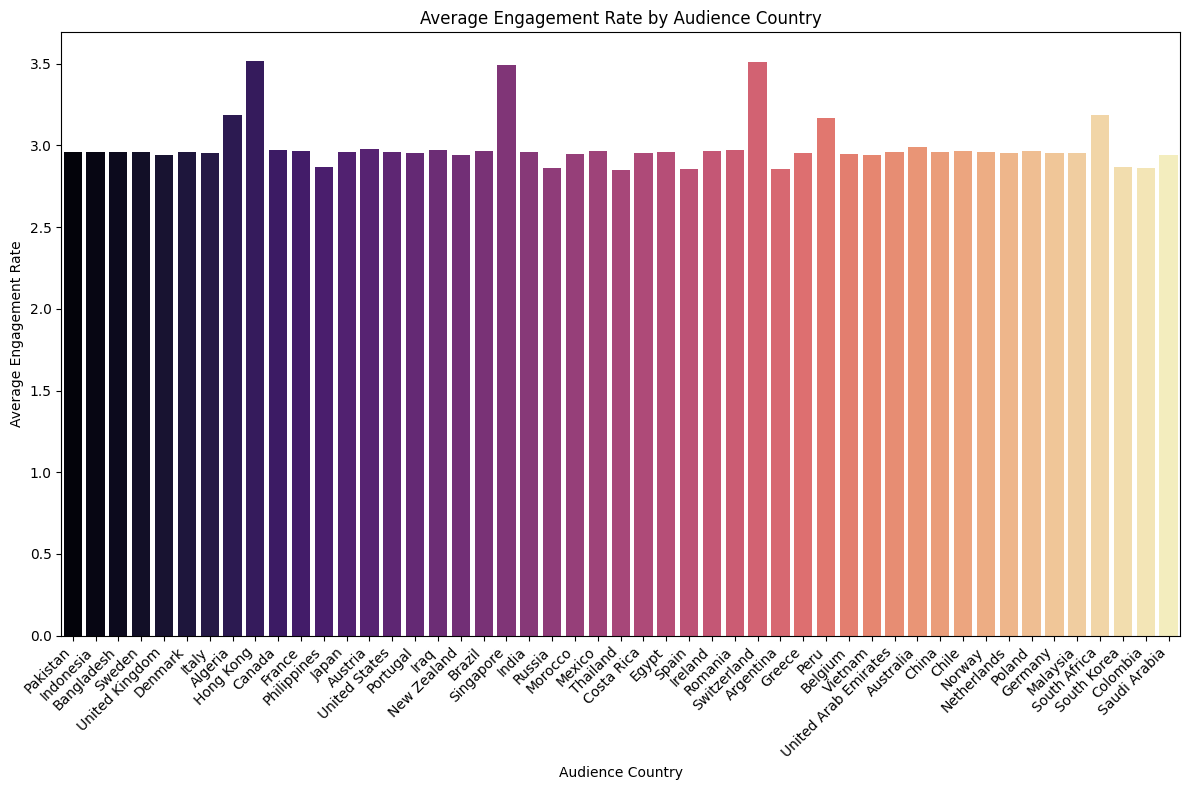

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Audience_country', y='Engagement_rate', data=df, ci=None, palette = 'magma')
plt.title('Average Engagement Rate by Audience Country')
plt.xlabel('Audience Country')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
gender_counts = df['Majority_audience_gender'].value_counts()

print(gender_counts['Female'])
print(gender_counts['Male'])

485964
484422


In [ ]:
def convert_to_num(value):
    if isinstance(value, str):
        if value.endswith('K'):
            return float(value[:-1]) * 1000
        elif value.endswith('M'):
            return float(value[:-1]) * 1000000
    return value

df['Avg_likes_partnership_posts'] = df['Avg_likes_partnership_posts'].apply(convert_to_num)

In [ ]:
column_name = 'Avg_likes_partnership_posts'

column_min = df[column_name].min()
column_max = df[column_name].max()

print("Minimum value of column '{}': {}".format(column_name, column_min))
print("Maximum value of column '{}': {}".format(column_name, column_max))

Minimum value of column 'Avg_likes_partnership_posts': 500
Maximum value of column 'Avg_likes_partnership_posts': 49999


In [ ]:
bins = [0, 1000, 5000, 10000, 50000, 100000]

bin_labels = ['Under 1K', '1K to 5K', '5K to 10K', '10K to 50K', '50K to 100K']

df['Likes Range'] = pd.cut(df['Avg_likes_partnership_posts'], bins=bins, labels=bin_labels, right=False)

print(df[['Avg_likes_partnership_posts', 'Likes Range']])

        Avg_likes_partnership_posts Likes Range
0                             21034  10K to 50K
1                              8861   5K to 10K
2                               867    Under 1K
3                              1492    1K to 5K
4                               642    Under 1K
...                             ...         ...
199995                          670    Under 1K
199996                         3662    1K to 5K
199997                         2107    1K to 5K
199998                         2779    1K to 5K
199999                         4591    1K to 5K

[970386 rows x 2 columns]


Text(0, 0.5, 'Frequency')

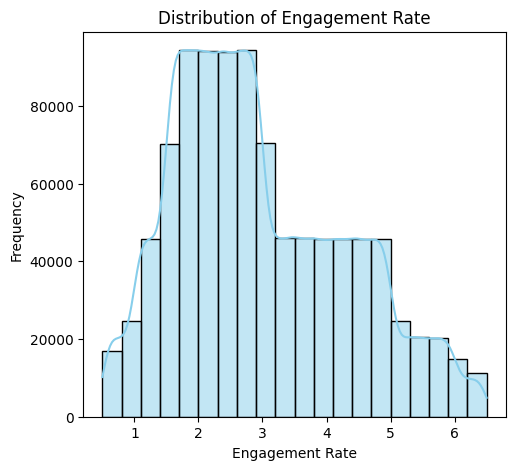

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Engagement_rate'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Engagement Rate')
plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')

In [ ]:
df.head(5)

,Influencer_insta_username,Influencer_real_name,Content_category,Number_of_followers,Audience_country,Influencer_location,Audience_age_range,Engagement_rate,Majority_audience_gender,Youtuber,Cost_per_post,Avg_likes_partnership_posts,Followers Range,engagement_category,Likes Range
0,csaunders,James Wilson,Spirituality,71095,Pakistan,Sweden,52-84,6.1,Female,Yes,200000,21034,50K to 100K,Very High,10K to 50K
1,maryfreeman,Brian Kim,Music,25054,Indonesia,Brazil,48-59,5.4,Female,No,50000,8861,10K to 50K,High,5K to 10K
2,lynn87,Gordon Saunders,Real Estate,75147,Bangladesh,Saudi Arabia,46-63,0.9,Female,No,200000,867,50K to 100K,Low,Under 1K
3,daycody,Michael Harris,Real Estate,99131,Sweden,Ireland,45-67,2.0,Male,Yes,200000,1492,50K to 100K,Average/Good,1K to 5K
4,michelle95,Kristine Robbins,Medical,38282,United Kingdom,Sweden,42-46,0.8,Male,No,50000,642,10K to 50K,Low,Under 1K


Text(0, 0.5, 'Frequency')

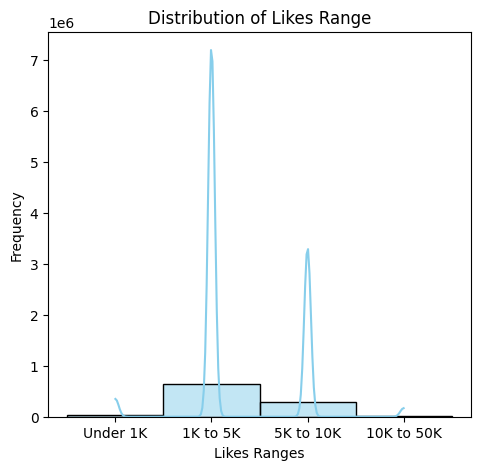

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Likes Range'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Likes Range')
plt.xlabel('Likes Ranges')
plt.ylabel('Frequency')

<ipython-input-117-0b90d2b2f2f7>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Likes Range', y='Engagement_rate', data=df, ci=None, palette='Set2')
<ipython-input-117-0b90d2b2f2f7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Likes Range', y='Engagement_rate', data=df, ci=None, palette='Set2')


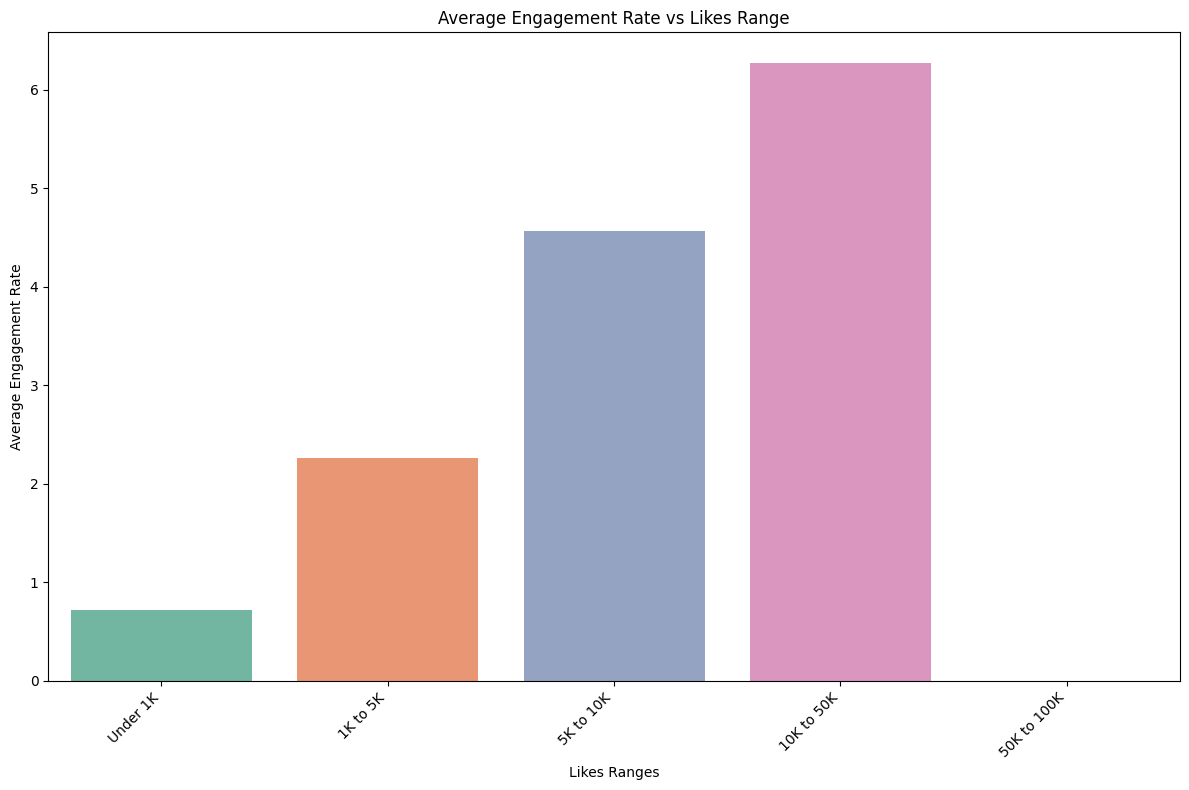

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(x='Likes Range', y='Engagement_rate', data=df, ci=None, palette='Set2')
plt.title('Average Engagement Rate vs Likes Range')
plt.xlabel('Likes Ranges')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df['Avg_likes_partnership_posts']

0         21034
1          8861
2           867
3          1492
4           642
          ...  
199995      670
199996     3662
199997     2107
199998     2779
199999     4591
Name: Avg_likes_partnership_posts, Length: 970386, dtype: int64

In [ ]:
print(df['Youtuber'])

0         Yes
1          No
2          No
3         Yes
4          No
         ... 
199995     No
199996    Yes
199997    Yes
199998    Yes
199999     No
Name: Youtuber, Length: 970386, dtype: object


In [ ]:
yt_count = df['Youtuber'].value_counts()

print(yt_count['Yes'])
print(yt_count['No'])

480842
479940


<ipython-input-122-791e2f973e85>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['YouTuber', 'Non-YouTuber'], y=[avg_likes_youtuber, avg_likes_non_youtuber], palette = "flare")


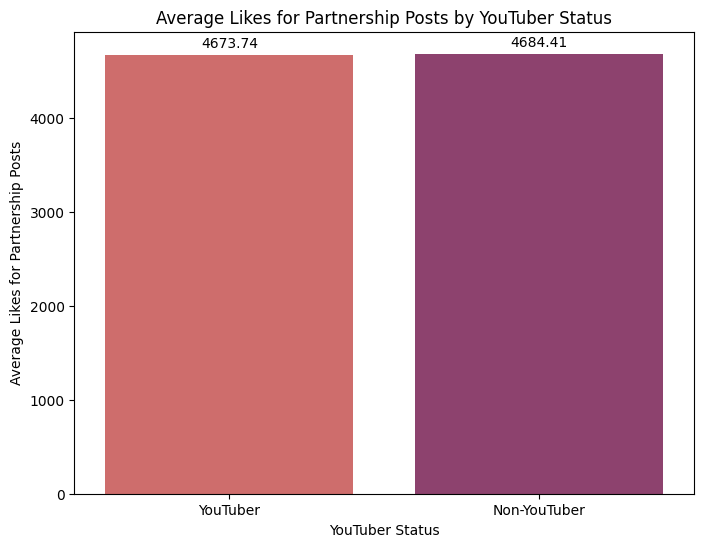

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_likes_youtuber = df[df['Youtuber'] == 'Yes']['Avg_likes_partnership_posts'].mean()
avg_likes_non_youtuber = df[df['Youtuber'] == 'No']['Avg_likes_partnership_posts'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=['YouTuber', 'Non-YouTuber'], y=[avg_likes_youtuber, avg_likes_non_youtuber], palette = "flare")

for index, value in enumerate([avg_likes_youtuber, avg_likes_non_youtuber]):
    plt.text(index, value + 50, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Average Likes for Partnership Posts by YouTuber Status')
plt.xlabel('YouTuber Status')
plt.ylabel('Average Likes for Partnership Posts')
plt.show()

In [ ]:
df['Audience_age_range']

0         52-84
1         48-59
2         46-63
3         45-67
4         42-46
          ...  
199995    26-74
199996    35-36
199997    18-78
199998    14-27
199999    41-69
Name: Audience_age_range, Length: 970386, dtype: object

In [ ]:
df['Audience_country']

0                     Pakistan
1                    Indonesia
2                   Bangladesh
3                       Sweden
4               United Kingdom
                  ...         
199995                   China
199996                  Greece
199997                  Norway
199998    United Arab Emirates
199999                  Norway
Name: Audience_country, Length: 970386, dtype: object

<ipython-input-125-f67fb9836456>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Audience_country', y='Engagement_rate', data=df, ci=None, palette = "flare")
<ipython-input-125-f67fb9836456>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Audience_country', y='Engagement_rate', data=df, ci=None, palette = "flare")


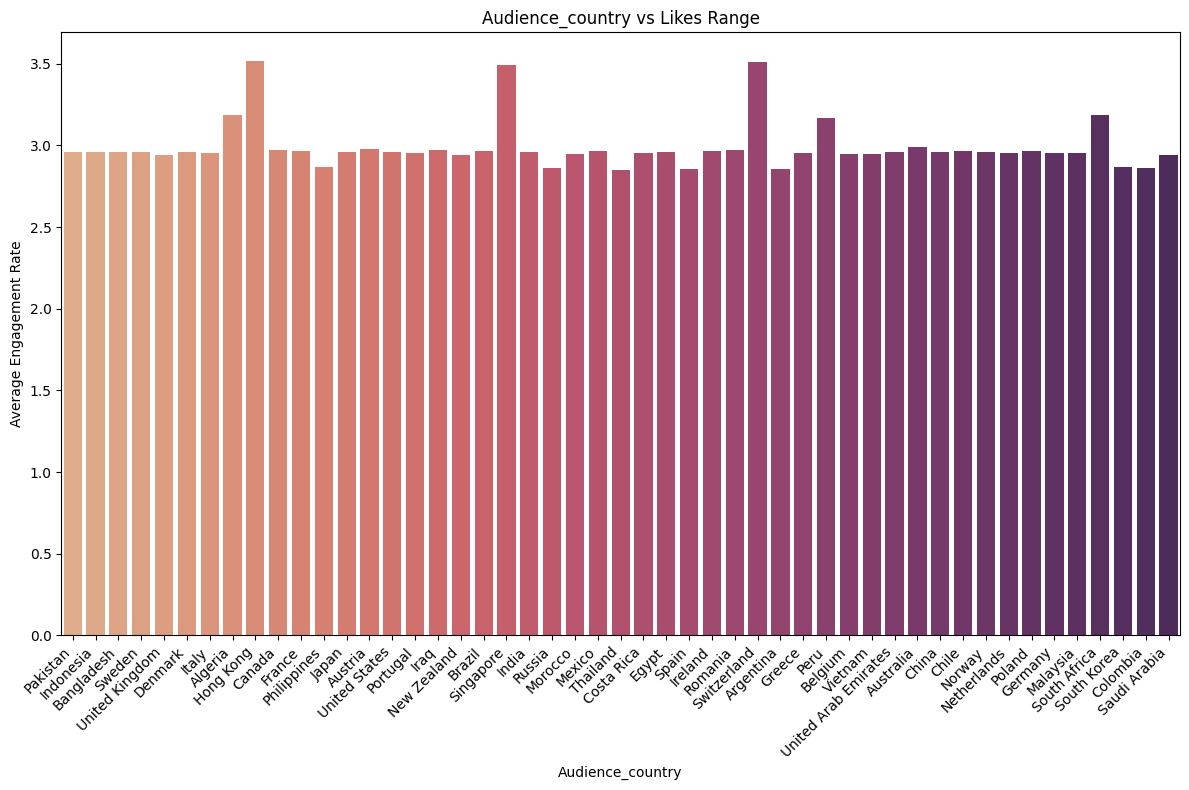

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Audience_country', y='Engagement_rate', data=df, ci=None, palette = "flare")
plt.title('Audience_country vs Likes Range')
plt.xlabel('Audience_country')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-126-6b35d885181f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Content_category', y='Engagement_rate', data=df, ci=None, palette = "flare")
<ipython-input-126-6b35d885181f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Content_category', y='Engagement_rate', data=df, ci=None, palette = "flare")


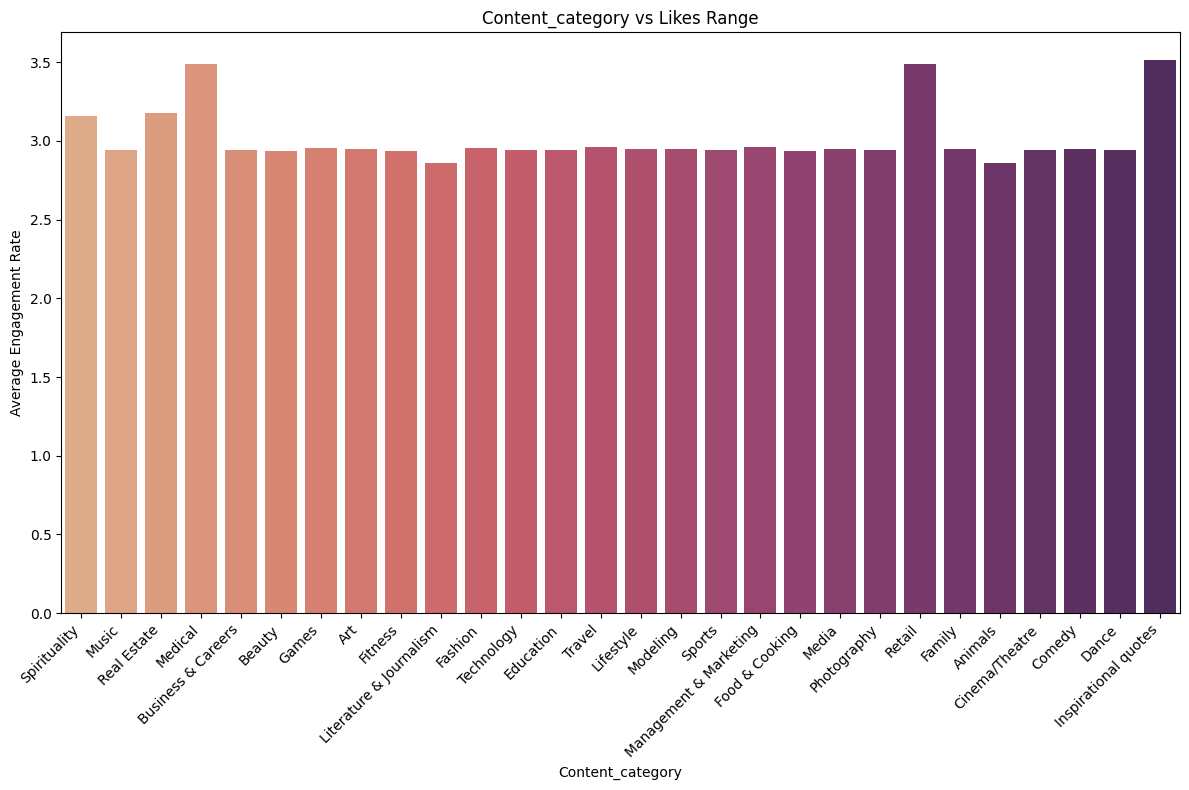

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Content_category', y='Engagement_rate', data=df, ci=None, palette = "flare")
plt.title('Content_category vs Likes Range')
plt.xlabel('Content_category')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

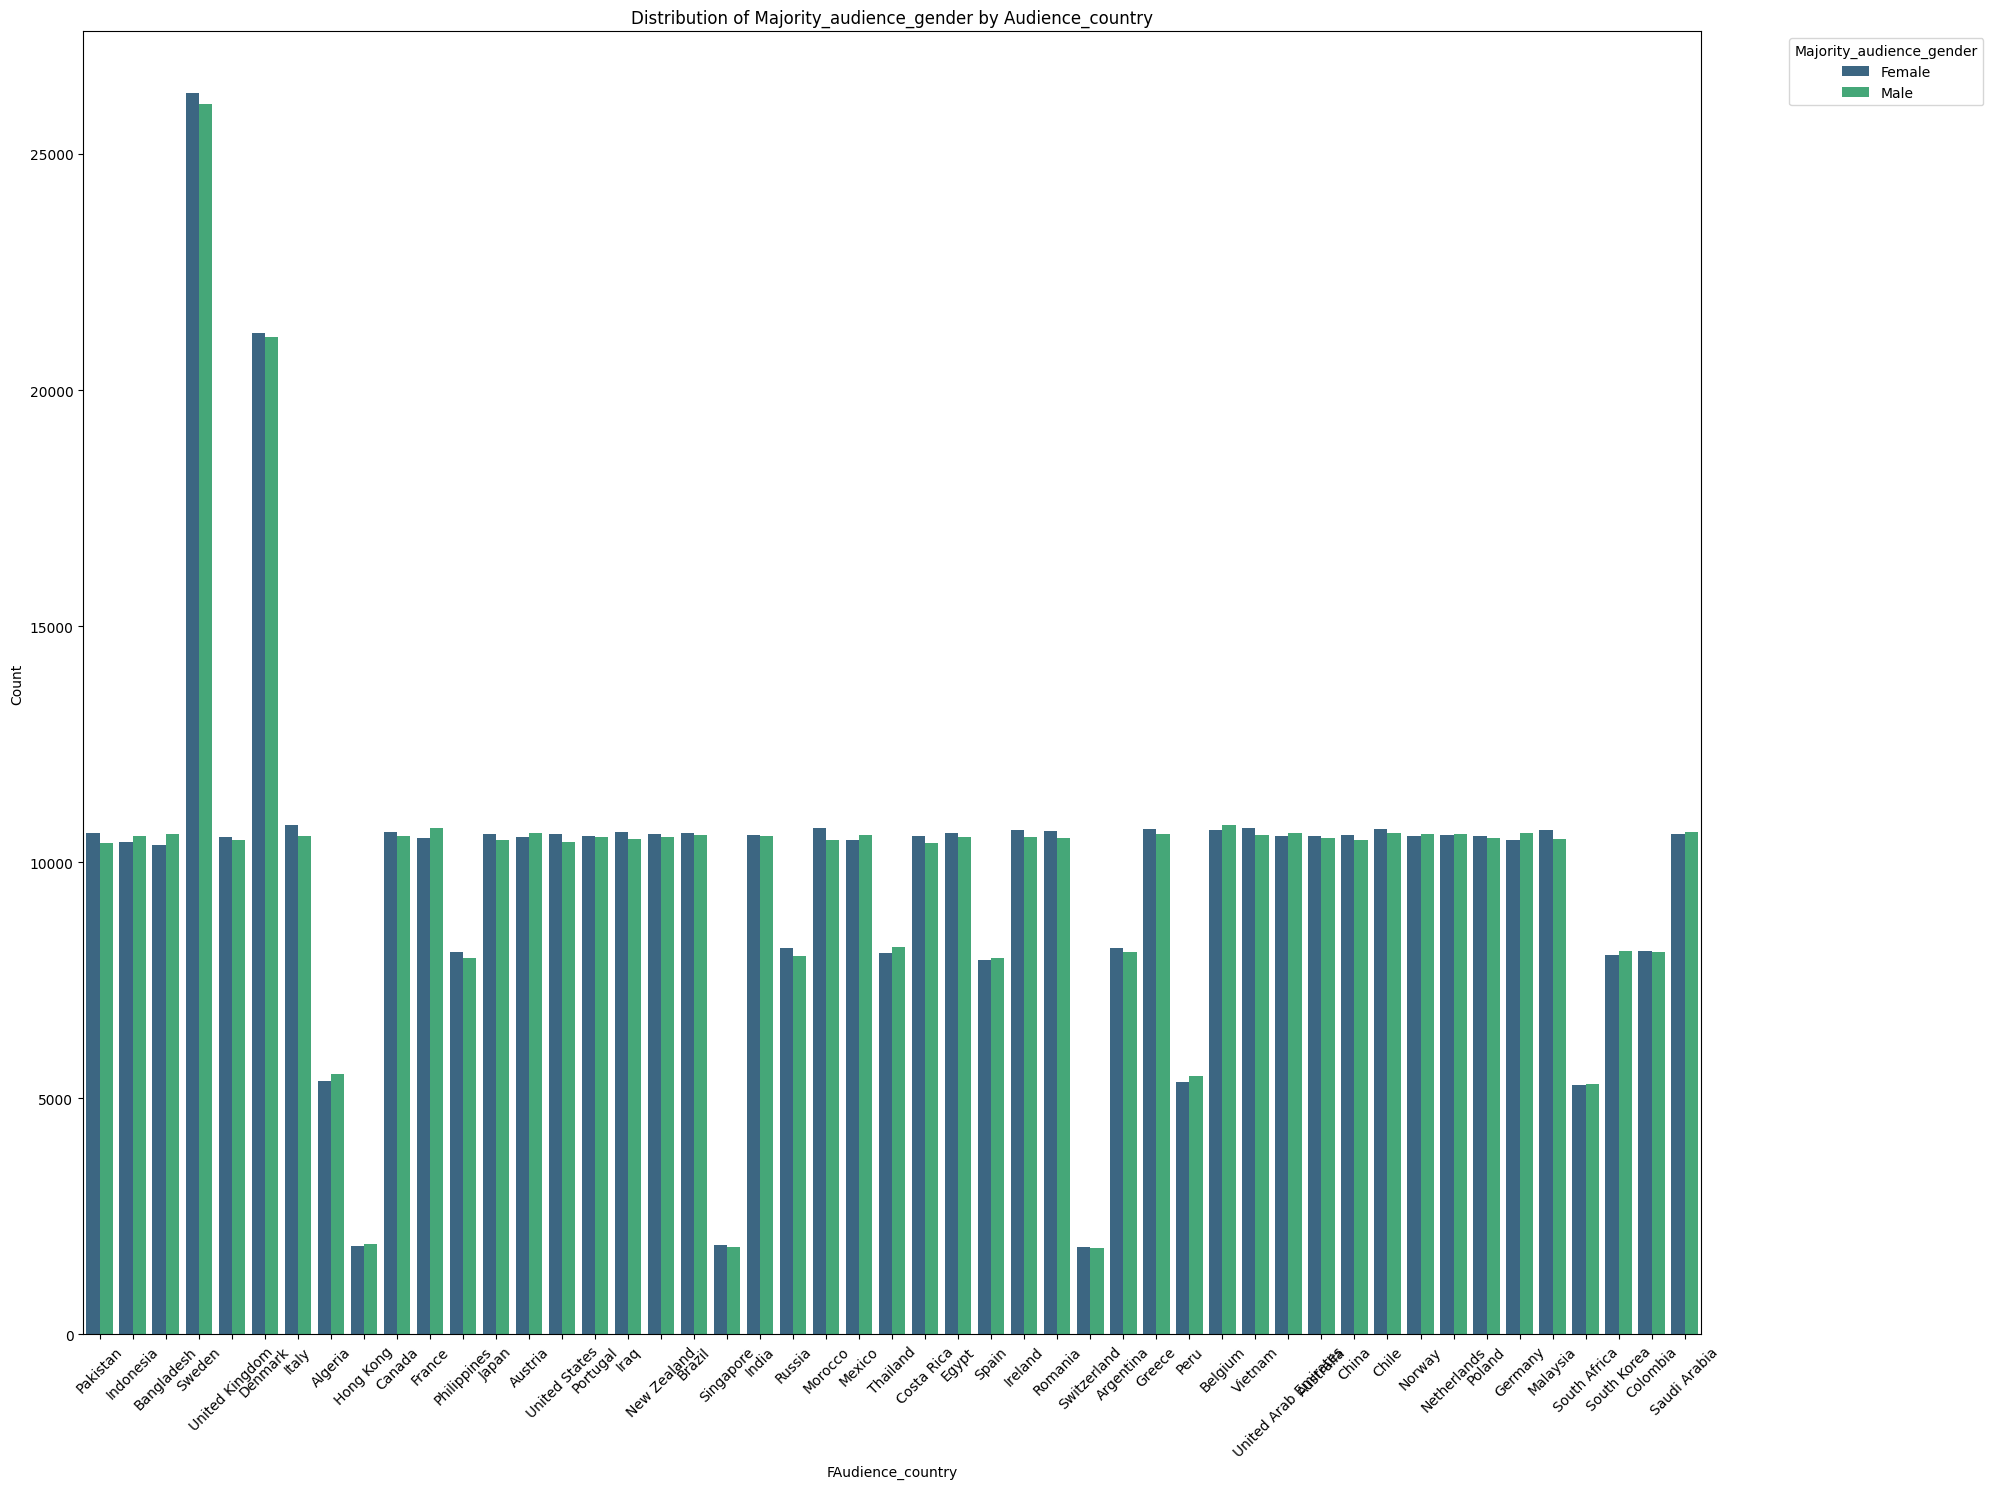

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
sns.countplot(x='Audience_country', data=df, hue='Majority_audience_gender', palette='viridis')
plt.title('Distribution of Majority_audience_gender by Audience_country')
plt.xlabel('FAudience_country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Majority_audience_gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-128-ef00d9d1ca47>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Content_category', y='Avg_likes_partnership_posts', data=df, ci=None, palette = "flare")
<ipython-input-128-ef00d9d1ca47>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Content_category', y='Avg_likes_partnership_posts', data=df, ci=None, palette = "flare")


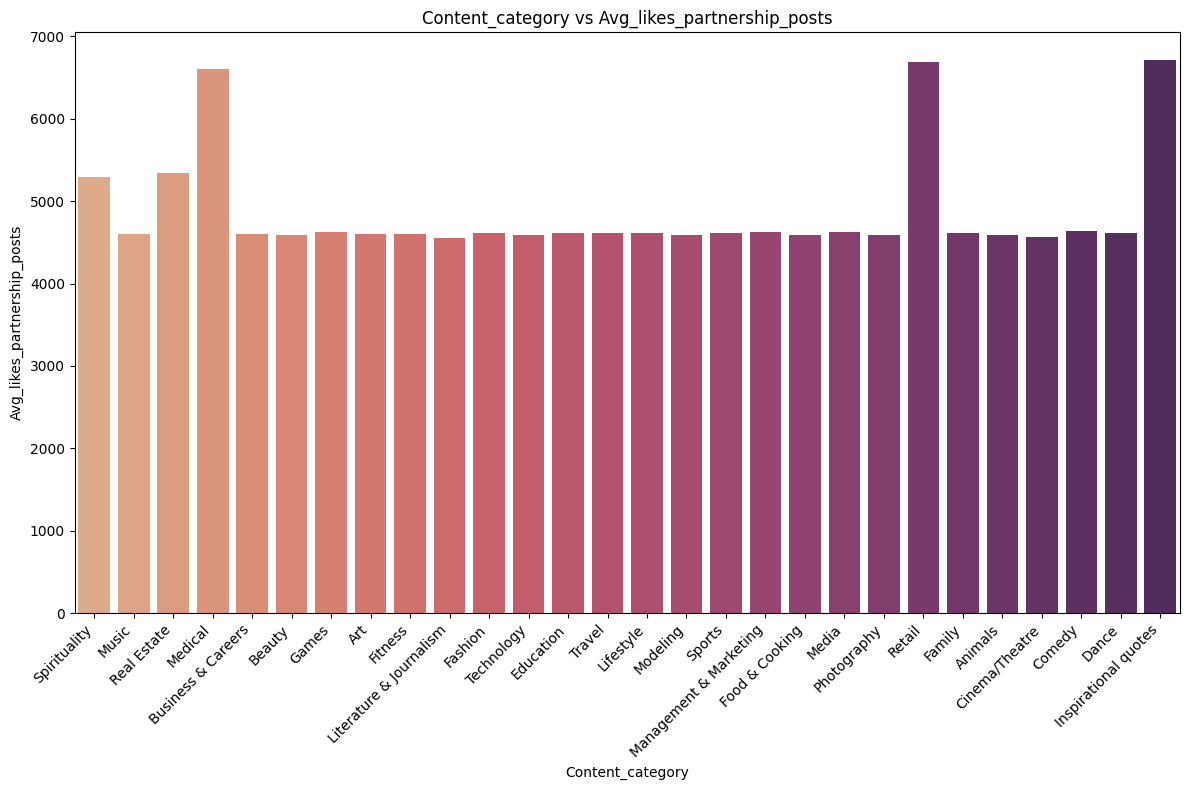

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Content_category', y='Avg_likes_partnership_posts', data=df, ci=None, palette = "flare")
plt.title('Content_category vs Avg_likes_partnership_posts')
plt.xlabel('Content_category')
plt.ylabel('Avg_likes_partnership_posts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()